In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

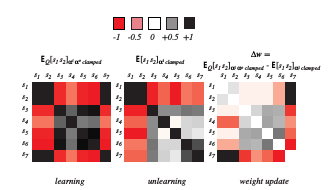

Fig.9: Boltzmann learning of a single pattern is illustrated for the seven-node network of Fig.8. The (symmetric) matrix on the left shows the correlation of units for the learning component, where the input units are clamped to s1 = +1, s2 = +1, and the outputs to s6 = −1, s7 = +1. The middle matrix shows the unlearning component, where the inputs are clamped but outputs are free to vary. The diﬀerence between those matrices is shown on the right, and is proportional to the weight update (Eq. 14). Notice, for instance, that because the correlation between s1 and s2 is large in both the learning and unlearning components (because those variables are clamped), there is no associated weight change, i.e., ∆w12 = 0. However, strong correlations between s1 and s7 in the learning but not in the unlearning component implies that the weight w17 should be increased, as can be seen in the weight update matrix.


## Stochastic Boltzmann Learning

### Visible States Learning

Before diving into the central concern of learning categories from training patterns, consider an alternative learning problem. Here, we aim to match the desired probabilities for all visible units, denoted as $ Q(\alpha) $ (derived from a training set), with the actual probabilities $P(\alpha) $, achieved through random simulations. These probabilities describe network states annealed without clamping input or output variables.

The probability of a visible configuration is given by:

$$
P(\alpha) = \sum_{\beta} P(\alpha, \beta) = \frac{\sum_{\beta} e^{-E_{\alpha\beta} / T}}{Z}
$$

where $ E_{\alpha\beta} $ is the system energy for a configuration defined by visible $ \alpha $ and hidden $ \beta $ units, and $ Z $ is the partition function.

A natural measure of the difference between the actual and desired probability distributions is the Kullback-Leibler (KL) divergence:

$$
D_{KL}(Q(\alpha), P(\alpha)) = \sum_{\alpha} Q(\alpha) \log \frac{Q(\alpha)}{P(\alpha)}.
$$

Gradient descent in this relative entropy is used for learning:

$$
\Delta w_{ij} = -\eta \frac{\partial D_{KL}}{\partial w_{ij}} = \eta \sum_{\alpha} \frac{Q(\alpha)}{P(\alpha)} \frac{\partial P(\alpha)}{\partial w_{ij}},
$$

where \( \eta \) is the learning rate. Substituting and simplifying:

$$
\Delta w_{ij} = \frac{\eta}{T} \left[ \mathbb{E}_Q[s_i s_j]^{\text{clamped}} - \mathbb{E}[s_i s_j]^{\text{free}} \right],
$$

where \( \mathbb{E}_Q[s_i s_j]^{\text{clamped}} \) is the correlation when visible units are clamped, and \( \mathbb{E}[s_i s_j]^{\text{free}} \) is the correlation when units are free to vary. Learning adjusts weights until these two terms are equal.

### Learning Input-Output Associations

To learn mappings from input to output, the network adjusts weights to match \( P(\alpha_o | \alpha_i) \) to \( Q(\alpha_o | \alpha_i) \), minimizing the KL divergence weighted by input probabilities:

$$
\bar{D}_{KL} = \sum_{\alpha_i} P(\alpha_i) \sum_{\alpha_o} Q(\alpha_o | \alpha_i) \log \frac{Q(\alpha_o | \alpha_i)}{P(\alpha_o | \alpha_i)}.
$$

The weight update rule is:

$$
\Delta w_{ij} = \frac{\eta}{T} \left[ \mathbb{E}_Q[s_i s_j]^{\alpha_i \alpha_o \text{ clamped}} - \mathbb{E}[s_i s_j]^{\alpha_i \text{ clamped}} \right].
$$

### Example of Learning a Single Pattern

Fig.8 illustrates a seven-unit network trained on:
- Input pattern: $ s_1 = +1, s_2 = +1 $
- Output pattern: $ s_6 = -1, s_7 = +1 $.

Initially, the network energy corresponds to random weights. Training lowers the energy for states with the desired output, increasing the likelihood of achieving the correct output during annealing.

For example, considering units $ s_1 $ and $ s_7 $:
- During learning, both are clamped at $ +1 $, so $ \mathbb{E}_Q[s_1 s_7] = +1 $.
- During unlearning, $ s_7 $ is free to vary, leading to a reduced correlation.

Weight updates strengthen associations between inputs and outputs while minimally adjusting hidden unit weights.

### Training Multiple Patterns

During training, each pattern in the dataset is presented sequentially, updating weights as described. Learning continues until the actual output matches the desired output for all patterns.

### References
- Fig.8: Training dynamics with a seven-unit network.
- Fig.9: Detailed learning of a single pattern.

## Deterministic Boltzmann Learning and Initialization Parameters

##  Deterministic Boltzmann Learning

The computational complexity of **stochastic Boltzmann learning** is very high due to the repeated annealing and polling of all units. To address this, **deterministic Boltzmann learning** employs mean-field annealing with analog values for $ s_i $, leading to significant computational savings.

At the end of deterministic simulated annealing, $ s_i $ values converge to $\pm 1$, as required. The following algorithm outlines the deterministic Boltzmann learning process:

### Algorithm 3: Deterministic Boltzmann Learning

1. **Initialize**:
   - Training dataset $ D $ (containing feature and category information).
   - Learning rate $ \eta $.
   - Temperature schedule $ T(k) $.
   - Weight matrix $ w_{ij} $ for $ i, j = 1, \ldots, N $.

2. **Repeat** until $ k = k_{\text{max}} $ or a convergence criterion is met:
   - Randomly select a training pattern $ x $.
   - Randomize the states $ s_i $.
   - **Anneal the network** with input and output clamped:
     - At low $ T $, compute $ \langle s_i s_j \rangle_{\alpha_i \alpha_o \text{ clamped}} $.
   - Randomize $ s_i $ states again.
   - **Anneal the network** with input clamped but output free:
     - At low $ T $, compute $ \langle s_i s_j \rangle_{\alpha_i \text{ clamped}} $.
   - Update weights:
     $$
     w_{ij} \leftarrow w_{ij} + \frac{\eta}{T} \left( \langle s_i s_j \rangle_{\alpha_i \alpha_o \text{ clamped}} - \langle s_i s_j \rangle_{\alpha_i \text{ clamped}} \right)
     $$

3. **Return** updated weights $ w_{ij} $.

Using mean-field theory, the correlations $ \langle s_i s_j \rangle $ can be efficiently approximated as:
$$
\langle s_i s_j \rangle \approx \langle s_i \rangle \langle s_j \rangle \approx s_i s_j
$$

---

##  Initialization and Setting Parameters

As with most classifiers, **Boltzmann networks** require careful parameter initialization:

### Network Topology

- **Visible Units**: Determined by the dimensions of the binary feature vectors and number of categories.
- **Hidden Units**:
  - Fully interconnected networks (input, output, hidden) are the default assumption.
  - Alternate topology: Eliminate interconnections among input and output units for faster training. However, this reduces the network's ability for pattern completion or classifying patterns with missing features.

### Number of Hidden Units

- Depends on the classification problem's complexity.
- Upper bound:
  $$
  \text{Hidden units} \leq n
  $$
  where $ n $ is the number of distinct input-output pairs in the training set. Each pattern corresponds to a unique hidden unit with value $ s_i = +1 $, while all others are $ s_i = -1 $.

This setup ensures a unique internal representation for every pattern.

### Final Notes

- **Learning rate** $( \eta $) and **temperature schedule** $( T(k) $) are critical for achieving convergence.
- Increasing hidden units enables the network to store more patterns but complicates interpretation of hidden unit representations.

$$
\text{Weight update: } w_{ij} \propto \langle s_i s_j \rangle
$$
is essential for efficient training and accurate classification.


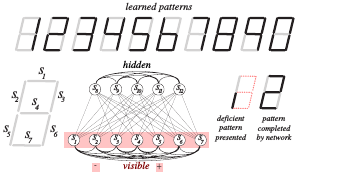

Fig.10: A Boltzmann network can be used for pattern completion, i.e., ﬁlling in unknown features of a deﬁcient pattern. Here, a twelve-unit network with ﬁve hidden units has been trained with the 10 numeral patterns of a seven-segment digital display. The diagram at the lower left shows the correspondence between the display segments and nodes of the network; a black segment is represented by a +1 and a light gray segment as a −1. Consider the deﬁcient pattern consisting of s2 = −1, s5 = +1. If these units are clamped and the full network annealed, the remaining ﬁve visible units will assume values most probable given the clamped ones, as shown at the right.

In [1]:
import numpy as np

# Define a Boltzmann Machine class
class BoltzmannMachine:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.num_units = num_visible + num_hidden

        # Initialize weights and biases
        self.weights = np.random.normal(0, 0.1, (self.num_units, self.num_units))
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.biases = np.zeros(self.num_units)

    def energy(self, state):
        """Compute the energy of a given state."""
        return -0.5 * np.dot(state, np.dot(self.weights, state)) - np.dot(self.biases, state)

    def update_weights(self, clamped_corr, free_corr, learning_rate, temperature):
        """Update weights using the deterministic Boltzmann learning rule."""
        delta_w = (clamped_corr - free_corr) * (learning_rate / temperature)
        self.weights += delta_w
        np.fill_diagonal(self.weights, 0)  # Ensure no self-connections

    def mean_field_update(self, state, temperature):
        """Perform a mean-field update to calculate the analog states."""
        for i in range(self.num_units):
            net_input = np.dot(self.weights[i], state) + self.biases[i]
            state[i] = np.tanh(net_input / temperature)  # Analog approximation
        return state

    def train(self, patterns, learning_rate=0.1, max_epochs=100, temperature=1.0):
        """Train the Boltzmann Machine using deterministic learning."""
        for epoch in range(max_epochs):
            for pattern in patterns:
                clamped_state = np.copy(pattern)

                # Clamped phase: calculate correlations
                self.mean_field_update(clamped_state, temperature)
                clamped_corr = np.outer(clamped_state, clamped_state)

                # Free phase: release output and calculate correlations
                free_state = np.random.uniform(-1, 1, self.num_units)
                self.mean_field_update(free_state, temperature)
                free_corr = np.outer(free_state, free_state)

                # Update weights
                self.update_weights(clamped_corr, free_corr, learning_rate, temperature)

    def pattern_completion(self, visible_units, max_iters=100, temperature=1.0):
        """Perform pattern completion to fill in missing features."""
        state = np.random.uniform(-1, 1, self.num_units)
        state[:self.num_visible] = visible_units

        for _ in range(max_iters):
            state = self.mean_field_update(state, temperature)
        
        return state[:self.num_visible]  # Return visible units

# Example: Training a Boltzmann Machine
num_visible = 7
num_hidden = 5
patterns = [
    np.array([+1, +1, -1, +1, -1, -1, +1, -1, +1, +1, -1, +1]),
    np.array([-1, +1, +1, -1, +1, -1, -1, +1, +1, -1, -1, +1])
]

# Initialize the Boltzmann Machine
bm = BoltzmannMachine(num_visible, num_hidden)

# Train the Boltzmann Machine
bm.train(patterns, learning_rate=0.05, max_epochs=50)

# Perform pattern completion
deficient_pattern = np.array([+1, +1, np.nan, +1, np.nan, -1, np.nan])
deficient_pattern[np.isnan(deficient_pattern)] = 0  # Replace missing with 0 for initial state
completed_pattern = bm.pattern_completion(deficient_pattern)

print("Completed Pattern:", completed_pattern)


Completed Pattern: [ 4.24663265e-61  3.97689445e-61  9.45552859e-62  1.47302110e-61
  3.17470811e-61 -1.62293835e-61 -1.47885076e-61]


### Boltzmann Learning Implementation


### Deterministic Boltzmann Learning: Parameters, Initialization, and Implementation

### Weight Initialization

For a particular hidden unit $i$, set $w_{ij}$ to be:
- Positive for each input unit $j$ corresponding to a $+1$ feature in its associated pattern.
- Negative for input units corresponding to a $-1$ feature.

For the remaining hidden units, invert the sign of the corresponding weights.

Connections between hidden units and output units:
- Positive for the known category.
- Negative for all other categories.

The internal representation is related to the probabilistic neural network implementation of Parzen windows. However, this approach results in an exponential growth in weights as the number of patterns increases, leading to slow training and poor generalization.

### Hidden Unit Count

1. **Upper Bound**:
   $n$, where $n$ is the number of training patterns.

2. **Lower Bound**:
   $\lceil \log_2 n \rceil$, required for distinct hidden configurations.

Practically, the number of hidden units depends on the classification problem's difficulty. To optimize:
- Start with a larger network and apply weight decay.

### Weight Decay

Add a small increment $\Delta w$ to $w_{ij}$:
- When $s_i$ and $s_j$ are both positive or both negative during the learning phase.
- Subtract during the unlearning phase.

Gradually decrease $\Delta w$ to reduce spurious correlations and eliminate unnecessary weights, improving generalization.

### Weight Initialization

1. Initialize roughly half of the weights as positive and the other half as negative.
2. Randomly assign weights within the range:
   $$
   -\frac{3}{N} < w_{ij} < \frac{3}{N},
   $$
   where $N$ is the total number of units.

### Annealing Schedule

Use $T(k+1) = cT(k)$ with $0.8 < c < 0.99$. For large iterations:
$$
T(k) = T(1) e^{-k/k_0},
$$
where $k_0$ is the decay constant.

#### Initial Temperature

Set the initial temperature $T(1)$ to ensure most candidate state transitions are accepted. To determine $T(1)$:

1. Let $m_1$ = number of energy-decreasing transitions.
2. Let $m_2$ = number of energy-increasing queries.
3. Let $E^+[\Delta E]$ = average energy increase.

The acceptance ratio is:
$$
R = \frac{m_1 + m_2 \cdot \exp(-E^+[\Delta E]/T(1))}{m_1 + m_2}.
$$

Rearranging:
$$
T(1) = \frac{E^+[\Delta E]}{\ln(m_2) - \ln(m_2 R - m_1(1 - R))}.
$$

Iterate until $m_1 + m_2 \approx m_0$ to determine $T(1)$.

### Learning Rate

The learning rate $\eta$ should satisfy:
$$
\eta \leq \frac{T^2}{N^2},
$$
where $T$ is the temperature and $N$ is the number of units.

### Stopping Criteria

1. **Annealing**:
   Stop when the temperature is low enough that no energetically unfavorable transitions are accepted.

2. **Training**:
   Monitor validation set error and stop when changes become negligible.

### Heuristic Speedup

- Propose simultaneous state changes for several nodes early in annealing.
- Store the current best configuration during annealing (pocket algorithm).


In [2]:
import numpy as np

def initialize_weights(num_visible, num_hidden):
    """
    Initialize weights for a fully connected Boltzmann Machine.
    Weights are randomly initialized within a small range.
    """
    limit = 3.0 / np.sqrt(num_visible + num_hidden)
    weights = np.random.uniform(-limit, limit, (num_visible + num_hidden, num_visible + num_hidden))
    np.fill_diagonal(weights, 0)  # No self-connections
    return weights

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def mean_field_update(weights, states, temperature):
    """
    Perform a mean-field update for the states.
    """
    net_input = np.dot(weights, states) / temperature
    return sigmoid(net_input)

def deterministic_boltzmann_learning(
    data, num_hidden, learning_rate=0.01, max_iterations=1000, initial_temp=5.0, final_temp=0.1, decay_factor=0.99
):
    """
    Train a Boltzmann network using deterministic Boltzmann learning.

    Parameters:
        data: numpy.ndarray
            Training data of shape (num_samples, num_features).
        num_hidden: int
            Number of hidden units.
        learning_rate: float
            Learning rate for weight updates.
        max_iterations: int
            Maximum number of iterations.
        initial_temp: float
            Initial temperature for annealing.
        final_temp: float
            Final temperature for annealing.
        decay_factor: float
            Decay factor for temperature.

    Returns:
        weights: numpy.ndarray
            Trained weights of the Boltzmann network.
    """
    num_visible = data.shape[1]
    num_units = num_visible + num_hidden

    # Initialize weights
    weights = initialize_weights(num_visible, num_hidden)

    # Training loop
    temperature = initial_temp
    for iteration in range(max_iterations):
        for sample in data:
            # Initialize states with visible units set to the sample data
            states = np.zeros(num_units)
            states[:num_visible] = sample

            # Phase 1: Clamp visible and hidden units
            for _ in range(10):  # Perform mean-field updates
                states = mean_field_update(weights, states, temperature)
            positive_phase = np.outer(states, states)

            # Phase 2: Clamp only visible units
            states = np.zeros(num_units)
            states[:num_visible] = sample
            for _ in range(10):
                states = mean_field_update(weights, states, temperature)
            negative_phase = np.outer(states, states)

            # Update weights
            weights += learning_rate / temperature * (positive_phase - negative_phase)

        # Annealing
        temperature = max(final_temp, temperature * decay_factor)

        # Monitoring progress (optional)
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Temperature {temperature:.3f}")

    return weights

# Example Usage
if __name__ == "__main__":
    # Example binary training data (6 samples, 4 features)
    training_data = np.array([
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 1, 0, 0],
        [0, 0, 1, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
    ])

    num_hidden_units = 2
    trained_weights = deterministic_boltzmann_learning(training_data, num_hidden_units)

    print("Trained Weights:")
    print(trained_weights)


Iteration 0, Temperature 4.950
Iteration 100, Temperature 1.812
Iteration 200, Temperature 0.663
Iteration 300, Temperature 0.243
Iteration 400, Temperature 0.100
Iteration 500, Temperature 0.100
Iteration 600, Temperature 0.100
Iteration 700, Temperature 0.100
Iteration 800, Temperature 0.100
Iteration 900, Temperature 0.100
Trained Weights:
[[ 0.         -0.32409552  0.46668382 -1.21143775 -0.34762855  1.04348059]
 [ 0.09847609  0.         -0.22074975  0.72970096 -0.95682954 -0.51045555]
 [-0.839566   -0.8421196   0.         -0.46542957  0.63778489  0.28172506]
 [-0.46508092  1.08856824 -0.57446273  0.          0.88406303 -1.119779  ]
 [-0.92498216 -0.83735974 -1.00024814 -0.72542854  0.          0.36057688]
 [-1.0749698  -0.55968228  0.35968964 -0.70270519  1.00014098  0.        ]]


Iteration 0, Temperature 4.950
Iteration 100, Temperature 1.812
Iteration 200, Temperature 0.663
Iteration 300, Temperature 0.243
Iteration 400, Temperature 0.100
Iteration 500, Temperature 0.100
Iteration 600, Temperature 0.100
Iteration 700, Temperature 0.100
Iteration 800, Temperature 0.100
Iteration 900, Temperature 0.100


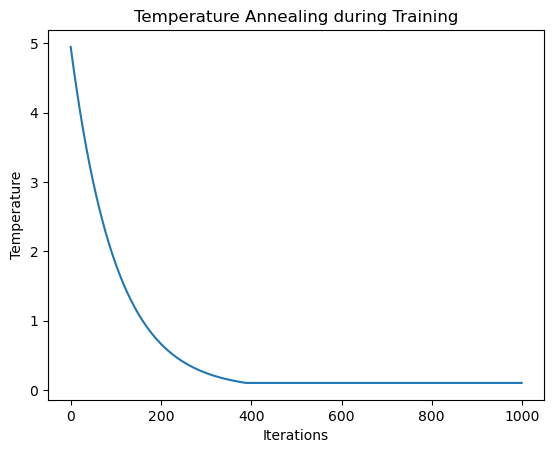

Trained Weights:
[0.0, -1.0270291544031762, -1.1181721072747337, -0.6235726082155728, 0.9422704160181026, 0.1693413985453711]
[0.11699764454690298, 0.0, 0.6063563792455795, 0.846288594457093, -0.05332382474255959, 0.38219128760103604]
[-0.8400171987208798, 0.09003455876591615, 0.0, -1.1824423269286826, 0.15414319034539514, 0.8394364648118862]
[-0.27998118489892465, -1.071963413800484, -0.26040911704488257, 0.0, 0.9160862888375585, -0.2814520978463314]
[0.19956428535521975, -0.5633849232396079, -0.596274405963942, -0.32317352668315524, 0.0, 0.8158254530987998]
[-0.6358845933561401, 0.7118917166302263, 0.08915586791284325, -1.169048634968155, 0.4239089072632414, 0.0]


In [3]:
import random
import math
import matplotlib.pyplot as plt

def initialize_weights(num_visible, num_hidden):
    """
    Initialize weights for a fully connected Boltzmann Machine.
    Weights are randomly initialized within a small range.
    """
    limit = 3.0 / math.sqrt(num_visible + num_hidden)
    weights = [[random.uniform(-limit, limit) for _ in range(num_visible + num_hidden)] for _ in range(num_visible + num_hidden)]
    
    # No self-connections (set diagonal to 0)
    for i in range(num_visible + num_hidden):
        weights[i][i] = 0
        
    return weights

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + math.exp(-x))

def mean_field_update(weights, states, temperature):
    """
    Perform a mean-field update for the states.
    """
    num_units = len(states)
    net_input = [sum(weights[i][j] * states[j] for j in range(num_units)) / temperature for i in range(num_units)]
    return [sigmoid(x) for x in net_input]

def outer_product(a, b):
    """Compute the outer product of two vectors."""
    return [[a[i] * b[j] for j in range(len(b))] for i in range(len(a))]

def deterministic_boltzmann_learning(
    data, num_hidden, learning_rate=0.01, max_iterations=1000, initial_temp=5.0, final_temp=0.1, decay_factor=0.99
):
    """
    Train a Boltzmann network using deterministic Boltzmann learning.
    """
    num_visible = len(data[0])
    num_units = num_visible + num_hidden

    # Initialize weights
    weights = initialize_weights(num_visible, num_hidden)

    # Training loop
    temperature = initial_temp
    temp_history = []
    for iteration in range(max_iterations):
        for sample in data:
            # Initialize states with visible units set to the sample data
            states = [0] * num_units
            for i in range(num_visible):
                states[i] = sample[i]

            # Phase 1: Clamp visible and hidden units
            for _ in range(10):  # Perform mean-field updates
                states = mean_field_update(weights, states, temperature)
            positive_phase = outer_product(states, states)

            # Phase 2: Clamp only visible units
            states = [0] * num_units
            for i in range(num_visible):
                states[i] = sample[i]
            for _ in range(10):
                states = mean_field_update(weights, states, temperature)
            negative_phase = outer_product(states, states)

            # Update weights
            for i in range(num_units):
                for j in range(num_units):
                    weights[i][j] += learning_rate / temperature * (positive_phase[i][j] - negative_phase[i][j])

        # Annealing
        temperature = max(final_temp, temperature * decay_factor)

        # Monitoring progress (optional)
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Temperature {temperature:.3f}")
        
        temp_history.append(temperature)

    # Plot temperature change over time
    plt.plot(range(max_iterations), temp_history)
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')
    plt.title('Temperature Annealing during Training')
    plt.show()

    return weights

# Example Usage
if __name__ == "__main__":
    # Example binary training data (6 samples, 4 features)
    training_data = [
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 1, 0, 0],
        [0, 0, 1, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
    ]

    num_hidden_units = 2
    trained_weights = deterministic_boltzmann_learning(training_data, num_hidden_units)

    print("Trained Weights:")
    for row in trained_weights:
        print(row)


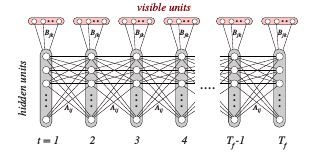

Fig.11: A Hidden Markov Model can be “unfolded” in time to show a trellis, which can be represented as a Boltzmann chain, as shown. The discrete hidden states are grouped into vertical sets, fully interconnected by weights $A_(ij)$ (related to the HMM transition probabilities aij ). The discrete visible states are grouped into horizontal sets, and are fully interconnected with the hidden states by weights $B_jk$ (related to transition probabilities $b_jk$ ). Training the net with a single pattern, or list of Tf visible states, consists of clamping the visible states and performing Boltzmann learning throughout the full network, with the constraint that each of the time shifted weights labeled by a particular $A_ij$ have the same numerical value.

## Boltzmann Networks and Graphical Models

### Boltzmann Networks and Graphical Models

While we have considered fully interconnected Boltzmann networks, the learning algorithm (Algorithm 3) applies equally well to networks with arbitrary connection topologies. Furthermore, it is easy to modify Boltzmann learning in order to impose constraints such as weight sharing. As a consequence, several popular recognition architectures—so-called graphical models such as Bayesian belief networks and Hidden Markov Models—have counterparts in structured Boltzmann networks, leading to new methods for training them.

Recall from Chapter ?? that Hidden Markov Models (HMMs) consist of several discrete hidden and visible states. At each discrete time step $t$, the system is in a single hidden state and emits a single visible state, denoted $\omega(t)$ and $v(t)$, respectively. The transition probabilities between hidden states at successive time steps are:

$$
a_{ij} = P(\omega_j(t + 1) | \omega_i(t)) \tag{19}$$

and between hidden and visible states at a given time are:

$$
b_{jk} = P(v_k(t) | \omega_j(t)). \tag{20}$$

The Forward-Backward or Baum-Welch algorithm (Chapter ??, Algorithm ??) is traditionally used for learning these parameters from a pattern of $T_f$ visible states:

$$
V_{T_f} = \{v(1), v(2), \dots, v(T_f)\}.
$$

> **Note**: Here we use $T_f$ to count the number of discrete time steps in order to avoid confusion with the temperature $T$ in Boltzmann simulations.

---

### HMM Trellis Representation

A Hidden Markov Model can be “unfolded” in time to show a trellis, which can be represented as a Boltzmann chain, as shown in Figure 7.11:

- The discrete hidden states are grouped into vertical sets, fully interconnected by weights $A_{ij}$ (related to the HMM transition probabilities $a_{ij}$).
- The discrete visible states are grouped into horizontal sets and are fully interconnected with the hidden states by weights $B_{jk}$ (related to transition probabilities $b_{jk}$).

Training the network with a single pattern, or list of $T_f$ visible states, consists of clamping the visible states and performing Boltzmann learning throughout the full network, with the constraint that each of the time-shifted weights labeled by a particular $A_{ij}$ have the same numerical value.

---

### Boltzmann Chain Representation

A structured Boltzmann network with the same trellis topology—a **Boltzmann chain**—can be used to implement the same classification as the corresponding Hidden Markov Model (Figure 7.11). Although it is often simpler to work in a representation where discrete states have multiple values, we temporarily work in a representation where the binary nodes take value $s_i = 0$ or $+1$, rather than $\pm1$ as in previous discussions.

In this representation, a special case of the general energy includes terms for a particular sequence of visible states $V_{T_f}$ and hidden states $\omega_{T_f} = \{\omega(1), \omega(2), \dots, \omega(T_f)\}$:

$$
E_{\omega, V} = E[\omega_{T_f}, V_{T_f}] = - \sum_{t=1}^{T_f - 1} A_{ij} - \sum_{t=1}^{T_f} B_{jk}, \tag{21}
$$

where the particular values of $A_{ij}$ and $B_{jk}$ terms depend implicitly upon the sequence. The choice of binary state representation implies that only the weights linking nodes that both have $s_i = +1$ appear in the energy. Each “legal” configuration—consisting of a single visible unit and a single hidden unit at each time—implies a set of $A_{ij}$ and $B_{jk}$ (Problem 20).

The partition function is the sum over all legal states:

$$
Z = \sum_{\omega, V} e^{-E_{\omega, V} / T}, \tag{22}
$$

which ensures normalization.

The correspondence between the Boltzmann chain at temperature $T$ and the unfolded Hidden Markov model (trellis) implies:

$$
A_{ij} = T \ln a_{ij}, \quad B_{jk} = T \ln b_{jk}. \tag{23}
$$

> **Note**: As in our discussion of Hidden Markov Models, we assume the initial hidden state is known, and thus there is no need to consider the correspondence of prior probabilities in the two approaches.

---

### Binary vs. Bipolar Representations

While the $0 \text{-} 1$ binary representation of states in the structured network clarifies the relationship to Hidden Markov Models through Equation (21), the more familiar representation $s_i = \pm 1$ works as well. Weights in the structured Boltzmann network are trained according to the method of Section 7.3, though the relation to transition probabilities in a Hidden Markov Model is no longer simple (Problem 21).


## Boltzmann Networks and Graphical Models

### Boltzmann Networks and Graphical Models

While we have considered fully interconnected Boltzmann networks, the learning algorithm (Algorithm 3) applies equally well to networks with arbitrary connection topologies. Furthermore, it is easy to modify Boltzmann learning in order to impose constraints such as weight sharing. As a consequence, several popular recognition architectures—so-called graphical models such as Bayesian belief networks and Hidden Markov Models—have counterparts in structured Boltzmann networks, leading to new methods for training them.

Recall from Chapter ?? that Hidden Markov Models (HMMs) consist of several discrete hidden and visible states. At each discrete time step $t$, the system is in a single hidden state and emits a single visible state, denoted $\omega(t)$ and $v(t)$, respectively. The transition probabilities between hidden states at successive time steps are:

$$
a_{ij} = P(\omega_j(t + 1) | \omega_i(t)) \tag{19}$$

and between hidden and visible states at a given time are:

$$
b_{jk} = P(v_k(t) | \omega_j(t)). \tag{20}$$

The Forward-Backward or Baum-Welch algorithm (Chapter ??, Algorithm ??) is traditionally used for learning these parameters from a pattern of $T_f$ visible states:

$$
V_{T_f} = \{v(1), v(2), \dots, v(T_f)\}.
$$

> **Note**: Here we use $T_f$ to count the number of discrete time steps in order to avoid confusion with the temperature $T$ in Boltzmann simulations.

---

### HMM Trellis Representation

A Hidden Markov Model can be “unfolded” in time to show a trellis, which can be represented as a Boltzmann chain, as shown in Figure 7.11:

- The discrete hidden states are grouped into vertical sets, fully interconnected by weights $A_{ij}$ (related to the HMM transition probabilities $a_{ij}$).
- The discrete visible states are grouped into horizontal sets and are fully interconnected with the hidden states by weights $B_{jk}$ (related to transition probabilities $b_{jk}$).

Training the network with a single pattern, or list of $T_f$ visible states, consists of clamping the visible states and performing Boltzmann learning throughout the full network, with the constraint that each of the time-shifted weights labeled by a particular $A_{ij}$ have the same numerical value.

---

### Boltzmann Chain Representation

A structured Boltzmann network with the same trellis topology—a **Boltzmann chain**—can be used to implement the same classification as the corresponding Hidden Markov Model (Figure 7.11). Although it is often simpler to work in a representation where discrete states have multiple values, we temporarily work in a representation where the binary nodes take value $s_i = 0$ or $+1$, rather than $\pm1$ as in previous discussions.

In this representation, a special case of the general energy includes terms for a particular sequence of visible states $V_{T_f}$ and hidden states $\omega_{T_f} = \{\omega(1), \omega(2), \dots, \omega(T_f)\}$:

$$
E_{\omega, V} = E[\omega_{T_f}, V_{T_f}] = - \sum_{t=1}^{T_f - 1} A_{ij} - \sum_{t=1}^{T_f} B_{jk}, \tag{21}
$$

where the particular values of $A_{ij}$ and $B_{jk}$ terms depend implicitly upon the sequence. The choice of binary state representation implies that only the weights linking nodes that both have $s_i = +1$ appear in the energy. Each “legal” configuration—consisting of a single visible unit and a single hidden unit at each time—implies a set of $A_{ij}$ and $B_{jk}$ (Problem 20).

The partition function is the sum over all legal states:

$$
Z = \sum_{\omega, V} e^{-E_{\omega, V} / T}, \tag{22}
$$

which ensures normalization.

The correspondence between the Boltzmann chain at temperature $T$ and the unfolded Hidden Markov model (trellis) implies:

$$
A_{ij} = T \ln a_{ij}, \quad B_{jk} = T \ln b_{jk}. \tag{23}
$$

> **Note**: As in our discussion of Hidden Markov Models, we assume the initial hidden state is known, and thus there is no need to consider the correspondence of prior probabilities in the two approaches.

---

### Binary vs. Bipolar Representations

While the $0 \text{-} 1$ binary representation of states in the structured network clarifies the relationship to Hidden Markov Models through Equation (21), the more familiar representation $s_i = \pm 1$ works as well. Weights in the structured Boltzmann network are trained according to the method of Section 7.3, though the relation to transition probabilities in a Hidden Markov Model is no longer simple (Problem 21).

---

### Implementation in Python



In [6]:
#Here is an implementation of the Boltzmann chain representation for a simplified Hidden Markov Model:


import numpy as np

class BoltzmannChain:
    def __init__(self, num_hidden, num_visible, temperature=1.0):
        self.num_hidden = num_hidden
        self.num_visible = num_visible
        self.temperature = temperature
        self.A = np.random.randn(num_hidden, num_hidden)  # Transition weights
        self.B = np.random.randn(num_hidden, num_visible)  # Emission weights

    def energy(self, hidden_states, visible_states):
        energy = 0
        # Transition energy
        for t in range(len(hidden_states) - 1):
            energy -= np.sum(self.A[hidden_states[t], hidden_states[t + 1]])
        # Emission energy
        for t in range(len(visible_states)):
            energy -= np.sum(self.B[hidden_states[t], visible_states[t]])
        return energy

    def partition_function(self, hidden_states, visible_states):
        legal_states = self.generate_legal_states(hidden_states, visible_states)
        return sum(np.exp(-self.energy(h, v) / self.temperature) for h, v in legal_states)

    def generate_legal_states(self, hidden_states, visible_states):
        # Generate all legal configurations for given sequences
        legal_states = []
        for h in range(self.num_hidden):
            for v in range(self.num_visible):
                legal_states.append((h, v))
        return legal_states

    def train(self, visible_sequence):
        hidden_states = np.random.randint(0, self.num_hidden, len(visible_sequence))
        for epoch in range(100):  # Simplified training loop
            grad_A, grad_B = self.compute_gradients(hidden_states, visible_sequence)
            self.A -= grad_A
            self.B -= grad_B

    def compute_gradients(self, hidden_states, visible_states):
        grad_A = np.zeros_like(self.A)
        grad_B = np.zeros_like(self.B)
        # Compute gradients (placeholder logic for illustration)
        return grad_A, grad_B

# Example usage
num_hidden = 3
num_visible = 3
temperature = 1.0
visible_sequence = [0, 1, 2, 1, 0]

model = BoltzmannChain(num_hidden, num_visible, temperature)
model.train(visible_sequence)



## Boltzmann Networks and Other Graphical Models

### Structured Boltzmann Networks and Hidden Markov Models

From Equation (23), the relationship between Boltzmann networks and Hidden Markov Models is given as:

$$
A_{ij} = T \ln a_{ij}, \quad B_{jk} = T \ln b_{jk}. \tag{23}
$$

In our discussion of Hidden Markov Models, we assume the initial hidden state is known, eliminating the need to consider prior probabilities. While the $0 \text{-} 1$ binary representation of states clarifies the relationship to Hidden Markov Models via Equation (21), the more familiar representation $s_i = \pm1$ can also be used. Weights in the structured Boltzmann network are trained as described in Section 7.3, although the direct connection to HMM transition probabilities becomes more complex.

---

### Other Graphical Models

Structured Boltzmann networks also have analogs in other graphical models, such as Bayesian belief networks. These directed acyclic graphs (DAGs) have nodes that represent discrete states interconnected with conditional probabilities. For simplicity, we consider binary states in belief nets, although multistate representations are often preferred in practice.

#### Boltzmann Zippers

A particularly interesting problem arises when a temporal signal exhibits two distinct timescales, such as:

- Rapid daily behavior (e.g., financial markets).
- Slow seasonal variations.

Standard Hidden Markov Models struggle with such problems due to their single inherent timescale. A potential solution is using two interconnected HMMs with different hidden state numbers. However, the Forward-Backward algorithm does not converge when closed loops exist, as in interconnected HMMs.

Instead, **Boltzmann zippers**, shown in Figure 7.12, can be used. These consist of two Boltzmann chains with cross-connections, enabling the system to learn:

- Short-term structures (via the "fast" chain).
- Long-term structures (via the "slow" chain).

The cross-connections, denoted by the weight matrix $E$, learn correlations between "fast" and "slow" internal representations. Unlike Equation (23), the $E$ weights do not directly correspond to transition probabilities.

Boltzmann zippers are particularly useful in applications like:

1. **Acoustic Speech Recognition**:
   - Fast chain learns phoneme transitions.
   - Slow chain learns prosody and stress over phrases.
2. **Speechreading (Lipreading)**:
   - Fast chain captures acoustic transitions.
   - Slow chain models slower lip and tongue movements.
3. **Body Gesture Recognition**:
   - Fast chain models hand motions.
   - Slow chain captures larger arm and torso movements.

---
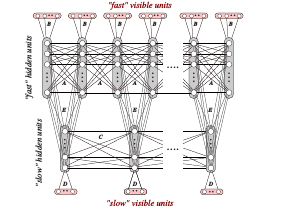

Fig.12: A Boltzmann zipper consists of two Boltzmann chains (cf. Fig.11), whose hidden units are interconnected. The component chains diﬀer in the rate at which visible features are sampled, and thus they capture structure at diﬀerent temporal scales. Correlations are learned by the weights linking the hidden units, here labeled E. It is somewhat more diﬃcult to train linked Hidden Markov Models to learn structure at diﬀerent time scales.

## Evolutionary Methods

### Overview

Inspired by biological evolution, evolutionary methods use stochastic search to optimize classifiers. These methods follow these steps:

1. **Initialization**:
   - Create a population of classifiers, each with slight variations.
2. **Evaluation**:
   - Score each classifier based on its performance on a task (e.g., accuracy on labeled examples). The score is often referred to as the *fitness*.
3. **Selection**:
   - Rank classifiers by fitness and retain the top performers ("survival of the fittest").
4. **Variation**:
   - Stochastically alter the retained classifiers to create a new generation. Variations can include mutations and recombinations.
5. **Repeat**:
   - Continue evaluation, selection, and variation for several generations until a termination criterion (e.g., desired accuracy) is met.

### Representations

Two common representations for classifiers include:

1. **Binary Strings** (used in genetic algorithms):
   - Classifiers are represented as strings of binary bits.
2. **Code Snippets** (used in genetic programming):
   - Classifiers are represented as small programs or expressions.

---

### Key Features of Evolutionary Methods

- **Stochastic Variations**:
  - Include both small and large changes in classifiers.
  - Allow exploration of complex, discontinuous spaces ("fitness landscapes").
- **Global Optimization**:
  - Evolutionary methods can discover good solutions where gradient-based methods fail, especially in non-convex or discontinuous spaces.

---

### Example Python Implementation: Boltzmann Zipper



In [9]:
#Below is a simplified implementation of a Boltzmann zipper:


import numpy as np

class BoltzmannZipper:
    def __init__(self, fast_units, slow_units, temperature=1.0):
        self.fast_units = fast_units
        self.slow_units = slow_units
        self.temperature = temperature
        self.A = np.random.randn(fast_units, fast_units)  # Fast chain weights
        self.B = np.random.randn(slow_units, slow_units)  # Slow chain weights
        self.E = np.random.randn(fast_units, slow_units)  # Cross-connections

    def energy(self, fast_states, slow_states):
        min_length = min(len(fast_states), len(slow_states))
        fast_states = np.array(fast_states[:min_length])
        slow_states = np.array(slow_states[:min_length])

        # Calculate the energies
        fast_energy = -np.sum(self.A[fast_states[:-1], fast_states[1:]]) if len(fast_states) > 1 else 0
        slow_energy = -np.sum(self.B[slow_states[:-1], slow_states[1:]]) if len(slow_states) > 1 else 0
        cross_energy = -np.sum(self.E[fast_states, slow_states])

        return fast_energy + slow_energy + cross_energy


    def train(self, fast_sequence, slow_sequence):
        # Placeholder for a training method
        pass

# Example usage
fast_units = 5
slow_units = 3
model = BoltzmannZipper(fast_units, slow_units)
fast_sequence = [0, 1, 2, 1, 0]
slow_sequence = [0, 1, 0]

print("Initial energy:", model.energy(fast_sequence, slow_sequence))


#This model demonstrates how to calculate the energy of interconnected fast and slow chains and highlights the flexibility of Boltzmann zippers for modeling multi-timescale phenomena.


Initial energy: -1.9606152407061235


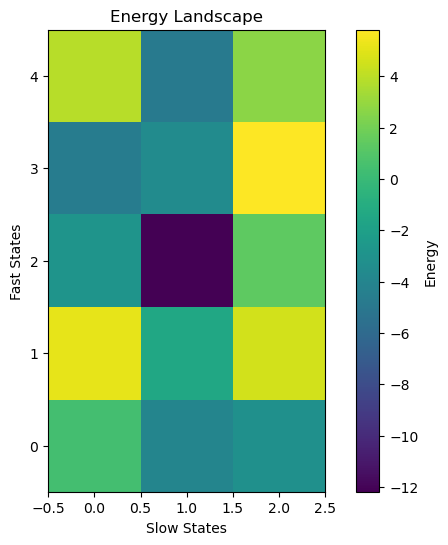

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class BoltzmannZipper:
    def __init__(self, fast_units, slow_units, temperature=1.0):
        self.fast_units = fast_units
        self.slow_units = slow_units
        self.temperature = temperature
        self.A = np.random.randn(fast_units, fast_units)  # Fast chain weights
        self.B = np.random.randn(slow_units, slow_units)  # Slow chain weights
        self.E = np.random.randn(fast_units, slow_units)  # Cross-connections

    def energy(self, fast_states, slow_states):
        # Ensure the two sequences have the same length for cross-energy computation
        min_length = min(len(fast_states), len(slow_states))
        fast_states = np.array(fast_states[:min_length])
        slow_states = np.array(slow_states[:min_length])
        
        # Calculate the energies
        fast_energy = -np.sum(self.A[fast_states[:-1], fast_states[1:]]) if len(fast_states) > 1 else 0
        slow_energy = -np.sum(self.B[slow_states[:-1], slow_states[1:]]) if len(slow_states) > 1 else 0
        cross_energy = -np.sum(self.E[fast_states, slow_states])
        
        return fast_energy + slow_energy + cross_energy

    def plot_energy_landscape(self, fast_states, slow_states):
        """Plot energy landscape for fast and slow states."""
        fast_range = range(self.fast_units)
        slow_range = range(self.slow_units)
        energy_values = np.zeros((len(fast_range), len(slow_range)))

        for f in fast_range:
            for s in slow_range:
                fast_config = [f] * len(fast_states)
                slow_config = [s] * len(slow_states)
                energy_values[f, s] = self.energy(fast_config, slow_config)

        plt.figure(figsize=(8, 6))
        plt.imshow(energy_values, cmap="viridis", origin="lower")
        plt.colorbar(label="Energy")
        plt.xlabel("Slow States")
        plt.ylabel("Fast States")
        plt.title("Energy Landscape")
        plt.show()

# Example usage
fast_units = 5
slow_units = 3
model = BoltzmannZipper(fast_units, slow_units)

# Define sequences
fast_sequence = [0, 1, 2, 1, 0]
slow_sequence = [0, 1, 0]

# Plot energy landscape
model.plot_energy_landscape(fast_sequence, slow_sequence)


Generation 1: Best Fitness = 13
Generation 2: Best Fitness = 15
Generation 3: Best Fitness = 15
Generation 4: Best Fitness = 15
Generation 5: Best Fitness = 15
Generation 6: Best Fitness = 15
Generation 7: Best Fitness = 16
Generation 8: Best Fitness = 16
Generation 9: Best Fitness = 16
Generation 10: Best Fitness = 16
Generation 11: Best Fitness = 16
Generation 12: Best Fitness = 16
Generation 13: Best Fitness = 16
Generation 14: Best Fitness = 17
Generation 15: Best Fitness = 17
Generation 16: Best Fitness = 17
Generation 17: Best Fitness = 17
Generation 18: Best Fitness = 17
Generation 19: Best Fitness = 18
Generation 20: Best Fitness = 18
Generation 21: Best Fitness = 18
Generation 22: Best Fitness = 18
Generation 23: Best Fitness = 18
Generation 24: Best Fitness = 18
Generation 25: Best Fitness = 18
Generation 26: Best Fitness = 18
Generation 27: Best Fitness = 18
Generation 28: Best Fitness = 18
Generation 29: Best Fitness = 18
Generation 30: Best Fitness = 18
Generation 31: Best

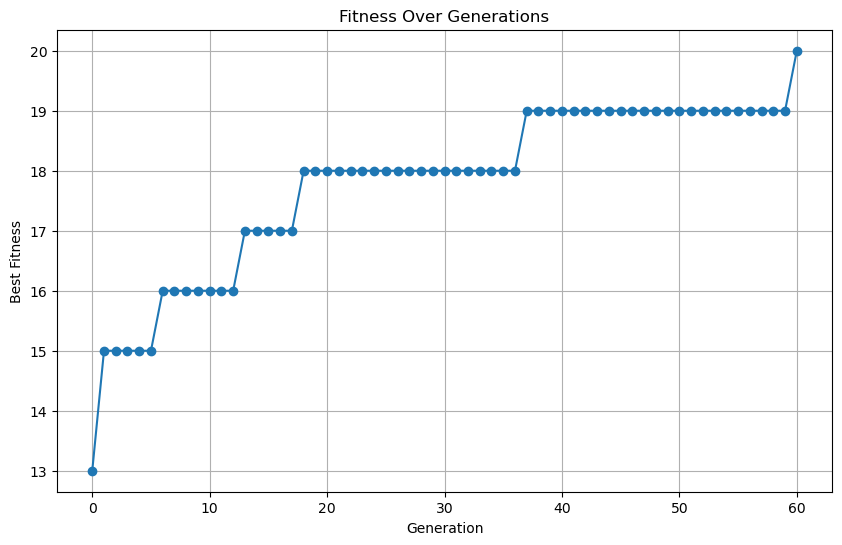

In [11]:
### Genetic Algorithms in Python

# Importing required libraries
import numpy as np
import random
import matplotlib.pyplot as plt

### Genetic Algorithm Implementation

# Define the Genetic Algorithm Class
class GeneticAlgorithm:
    def __init__(self, population_size, chromosome_length, crossover_prob, mutation_prob, fitness_threshold):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.fitness_threshold = fitness_threshold

    def initialize_population(self):
        """Initialize the population with random binary chromosomes."""
        return np.random.randint(2, size=(self.population_size, self.chromosome_length))

    def calculate_fitness(self, chromosome):
        """Fitness function: Sum of bits (or any other task-specific function)."""
        return np.sum(chromosome)

    def rank_population(self, population):
        """Rank population based on fitness."""
        fitness_values = [self.calculate_fitness(chromosome) for chromosome in population]
        ranked = sorted(zip(population, fitness_values), key=lambda x: x[1], reverse=True)
        return [x[0] for x in ranked], [x[1] for x in ranked]

    def crossover(self, parent1, parent2):
        """Perform single-point crossover."""
        if random.random() < self.crossover_prob:
            crossover_point = random.randint(1, self.chromosome_length - 1)
            offspring1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            offspring2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            return offspring1, offspring2
        return parent1, parent2

    def mutate(self, chromosome):
        """Perform mutation on a chromosome."""
        for i in range(len(chromosome)):
            if random.random() < self.mutation_prob:
                chromosome[i] = 1 - chromosome[i]
        return chromosome

    def evolve_population(self, population):
        """Evolve population through selection, crossover, and mutation."""
        ranked_population, fitness_values = self.rank_population(population)

        # Select parents (top 2 chromosomes for elitism)
        new_population = [ranked_population[0], ranked_population[1]]
        while len(new_population) < self.population_size:
            parent1, parent2 = random.choices(ranked_population[:self.population_size // 2], k=2)
            offspring1, offspring2 = self.crossover(parent1, parent2)
            new_population.append(self.mutate(offspring1))
            if len(new_population) < self.population_size:
                new_population.append(self.mutate(offspring2))

        return np.array(new_population), max(fitness_values)

    def run(self):
        """Run the Genetic Algorithm until a chromosome meets the fitness threshold."""
        population = self.initialize_population()
        generation = 0
        best_fitness = 0
        fitness_history = []

        while best_fitness < self.fitness_threshold:
            generation += 1
            population, best_fitness = self.evolve_population(population)
            fitness_history.append(best_fitness)
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

        return generation, population, fitness_history

# Parameters for Genetic Algorithm
population_size = 10
chromosome_length = 20
crossover_prob = 0.7
mutation_prob = 0.01
fitness_threshold = chromosome_length

# Run the Genetic Algorithm
ga = GeneticAlgorithm(population_size, chromosome_length, crossover_prob, mutation_prob, fitness_threshold)
generation, population, fitness_history = ga.run()

# Plot Fitness Over Generations
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, marker='o')
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid()
plt.show()




## Genetic Algorithms

In this notebook, we will explore Genetic Algorithms (GAs), a class of optimization techniques inspired by the principles of natural selection and evolution. GAs are particularly useful for solving complex optimization problems where the search space is vast and discontinuous.

## Algorithm Overview

### Genetic Algorithm Structure
The basic steps of a Genetic Algorithm are as follows:

1. **Initialization:** Create a population of random binary strings (chromosomes).
2. **Evaluation:** Compute a fitness score for each chromosome.
3. **Selection:** Rank chromosomes by fitness and select the best ones for reproduction.
4. **Reproduction:**
   - **Crossover:** Combine segments of two parent chromosomes to produce offspring.
   - **Mutation:** Introduce random changes to some bits of the chromosomes.
5. **Termination:** Repeat until a stopping criterion is met (e.g., achieving a desired fitness).

## Genetic Algorithms

## Introduction

Genetic algorithms are evolutionary methods inspired by the process of biological evolution. These methods introduce random variations and large changes in classifiers, allowing them to find effective solutions in complex, discontinuous spaces or “fitness landscapes” that gradient descent cannot easily address.  

### Basic Genetic Algorithm

In basic genetic algorithms, each classifier is represented as a binary string, known as a **chromosome**. The mapping from the chromosome to the classifier's features depends on the problem domain, offering significant design flexibility.

In pattern classification tasks, the **score** of a chromosome is usually a monotonic function of accuracy on a dataset, potentially with a penalty to avoid overfitting. The desired **fitness** score, denoted as $ \theta $, serves as the stopping criterion.

---

### Algorithm : Basic Genetic Algorithm

**Steps**:
1. **Initialize** parameters $ \theta $, $ P_{\text{co}} $, $ P_{\text{mut}} $, and $ L $ $ N $-bit chromosomes.
2. **Compute Fitness**: Determine the fitness $ f_i $ of each chromosome $ i $, where $ i = 1, \dots, L $.
3. **Rank Chromosomes**: Sort chromosomes based on their scores.
4. **Select Parents**: Choose two chromosomes with the highest scores.
5. **Crossover or Mutation**:
   - If $ \text{Rand}[0, 1) < P_{\text{co}} $, perform crossover at a randomly chosen bit.
   - Otherwise, mutate each bit with probability $ P_{\text{mut}} $.
6. **Generate Offspring**: Replace parent chromosomes with offspring.
7. Repeat until any chromosome's fitness $f $ exceeds $ \theta $.
8. **Return** the chromosome with the highest fitness as the best classifier.

---

### Genetic Operators

#### 1. **Replication**
A chromosome is reproduced unchanged, ensuring high-quality solutions are preserved.

#### 2. **Crossover**
- Two chromosomes **mate** by splitting at a randomly chosen point.
- The first part of chromosome $ A $ combines with the last part of chromosome $ B $, and vice versa, forming two new chromosomes.
- The probability of crossover is $ P_{\text{co}} $.

#### 3. **Mutation**
- Each bit of a chromosome is altered with a small probability $ P_{\text{mut}} $, flipping $ 1 \leftrightarrow 0 $.

### Stopping Criterion
The algorithm stops when any chromosome achieves a fitness $ f > \theta $, adhering to the principle of **survival of the fittest**.

---

### Representation

The mapping of chromosomes to classifiers varies depending on the task. Common representations include:
- **Features**: Binary bits specify features (e.g., pixels in character recognition).
- **Weights**: Represent neural network weights or interconnections.
- **Decision Trees**: Bits can encode decision tree properties, optimizing specific portions of the input space.

### Figures

#### Evolution of a Population
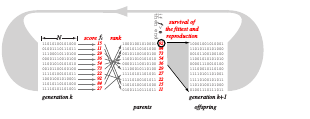

Fig.13: A basic genetic algorithm is a stochastic iterative search method. Each of the L classiﬁers in the population in generation k is represented by a string of bits of length N , called a chromosome (on the left). Each classiﬁer is judged or scored according its performance on a classiﬁcation task, giving L scalar values $f_i$ . The chromosomes are then ranked according to these scores. The chromosomes are considered in descending order of score, and operated upon by the genetic operators of replication, crossover and mutation to form the next generation of chromosomes — the oﬀspring. The cycle repeats until a classiﬁer exceeds the criterion score $\theta$.
#### Genetic Operations
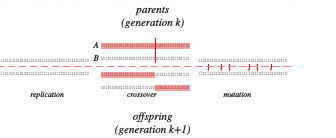

Fig.14: Three basic genetic operations are used to transform a population of chromosomes at one generation to form a new generation. In replication, the chromo- some is unchanged. Crossover involves the mixing or “mating” of two chromosomes to yield two new chromosomes. A position along the chromosomes is chosen randomly (red vertical line); then the ﬁrst part of chromosome A is linked with the last part of chromosome B, and vice versa. In mutation, each bit is given a small chance of being changed from a 1 to a 0 or vice versa.

---

### Other Operators

- **Inversion**: A chromosome is reversed front-to-back. Rarely used, as it often degrades performance.
- **Insertion**: Occasionally considered to introduce further diversity.

Genetic algorithms are a robust and flexible tool for optimization and classifier design, capable of adapting to a wide variety of problem domains.

---




## Explanation of Parameters

- **Population Size ($P$):** Number of chromosomes in each generation.
- **Chromosome Length ($L$):** Number of bits in each chromosome.
- **Crossover Probability ($P_{co}$):** Likelihood of combining two parents.
- **Mutation Probability ($P_{mut}$):** Likelihood of flipping a bit in a chromosome.
- **Generations:** Number of iterations before termination.
- **Fitness Threshold ($\theta$):** Desired fitness to stop the algorithm.

## Results
After running the algorithm, you will see a plot of the fitness over generations. The algorithm terminates when the fitness reaches the specified threshold or the maximum number of generations is reached.

This implementation serves as a basic framework and can be adapted for various problem domains by modifying the fitness function and chromosome representation.





Stopping at generation 1


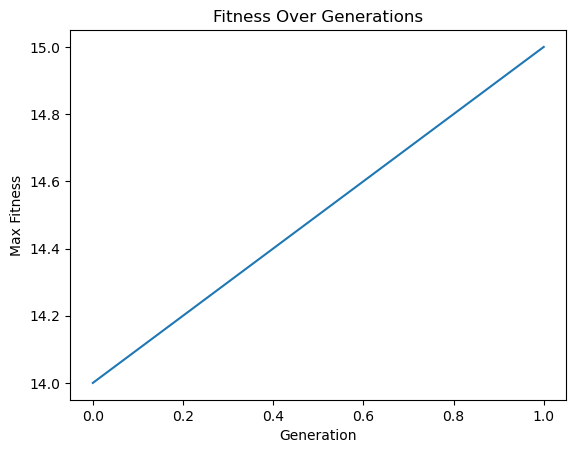

In [12]:
## Algorithm Implementation in Python

import numpy as np
import matplotlib.pyplot as plt

# Genetic Algorithm Parameters
POPULATION_SIZE = 50
CHROMOSOME_LENGTH = 20
P_CROSSOVER = 0.7
P_MUTATION = 0.01
GENERATIONS = 100
FITNESS_THRESHOLD = 15

# Fitness Function
def fitness_function(chromosome):
    return sum(chromosome)  # Example: maximize the number of 1s

# Initialize Population
def initialize_population(size, length):
    return np.random.randint(2, size=(size, length))

# Evaluate Fitness
def evaluate_fitness(population):
    return np.array([fitness_function(ind) for ind in population])

# Selection
def select_parents(population, fitness):
    probabilities = fitness / fitness.sum()
    parents_idx = np.random.choice(len(population), size=2, p=probabilities)
    return population[parents_idx]

# Crossover
def crossover(parent1, parent2):
    if np.random.rand() < P_CROSSOVER:
        point = np.random.randint(1, CHROMOSOME_LENGTH - 1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    return parent1, parent2

# Mutation
def mutate(chromosome):
    for i in range(len(chromosome)):
        if np.random.rand() < P_MUTATION:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

# Genetic Algorithm Main Loop
def genetic_algorithm():
    population = initialize_population(POPULATION_SIZE, CHROMOSOME_LENGTH)
    fitness_history = []

    for generation in range(GENERATIONS):
        fitness = evaluate_fitness(population)
        fitness_history.append(fitness.max())

        if fitness.max() >= FITNESS_THRESHOLD:
            print(f"Stopping at generation {generation}")
            break

        new_population = []

        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = select_parents(population, fitness)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            new_population.append(mutate(child2))

        population = np.array(new_population[:POPULATION_SIZE])

    return fitness_history

# Run Genetic Algorithm
fitness_history = genetic_algorithm()

# Plot Fitness History
plt.plot(fitness_history)
plt.xlabel('Generation')
plt.ylabel('Max Fitness')
plt.title('Fitness Over Generations')
plt.show()

## Scoring and Selection in Genetic Algorithms

## Scoring

For a **c-category classification problem**, it is convenient to evolve $ c $ dichotomizers, where each dichotomizer distinguishes one class $ \omega_i $ from all others $ \omega_j $, $ j \neq i $. During classification, the test pattern is presented to each of the $ c $ dichotomizers, and the final label is assigned based on the output.

### Goals of Classifier Design

- **Accuracy**: Maximize classification accuracy for future patterns.
- **Cost Minimization**: Minimize the expected cost when decisions have associated costs.

These goals are reflected in the **scoring** and **selection** process of a genetic algorithm.  

---

### Challenges: Overfitting

A classifier may become **tuned** to a particular dataset, leading to overfitting. Strategies to mitigate this include:
1. **Penalizing Complexity**: Incorporate a term in the score to penalize overly complex classifiers.
2. **Adjusting Stopping Criteria**: Modify the termination condition to avoid overfitting. 

The appropriate measures depend heavily on the problem domain, requiring experimentation with parameters.

---

## Selection

Selection determines which chromosomes in one generation contribute to the next. 

### Fitness-Based Selection

Chromosomes are ranked by **fitness** and selected in decreasing order until the next generation is filled. While this generally improves the population's average fitness, the improvement depends on the **variance** of fitness scores in a generation. 

---

### Fitness-Proportional Selection

In **fitness-proportional selection**, a chromosome's probability of being selected is proportional to its fitness:
$$
P(i) \propto f_i
$$
This method:
- **Prefers High Fitness**: High-fitness chromosomes are more likely to be selected.
- **Preserves Diversity**: Occasionally selects low-fitness chromosomes, increasing population variance.

---

### Modified Selection Functions

Instead of directly proportional fitness, probabilities may depend on a monotonically increasing function $ g(f) $, such as:
1. Functions with a positive second derivative enhance high-fitness selection.
2. A **Boltzmann-inspired approach** adjusts selection probability dynamically:
   $$
   P(i) = \frac{e^{f_i / T}}{\mathbb{E}[e^{f / T}]}
   $$
   where:
   - $ f_i $ is the fitness of chromosome $ i $,
   - $ T $ is a control parameter (temperature),
   - $ \mathbb{E}[e^{f / T}] $ is the expected value over the current generation.

---

### Boltzmann Selection Process

- **Early Search** $( T $ high): All chromosomes have roughly equal selection probability, encouraging exploration of the fitness landscape.
- **Late Search** $( T $ low): Focus on high-fitness chromosomes, exploiting optimal regions.

This process mimics biological evolution:
- Early stages emphasize **diversity** and broad exploration.
- Later stages **exploit** specific fitness opportunities near optimal solutions.

---

## Binary Tree Classifier Representation

Figure 7.15 illustrates the mapping of a binary chromosome to a **binary tree classifier** for a 4-feature, monothetic tree dichotomizer:

- Each node queries $ \pm x_i < \theta? $ and is encoded by 9 bits:
  - The **first bit** specifies the sign $( \pm $).
  - The **next two bits** identify the feature queried $( x_1, x_2, x_3, x_4 $).
  - The **remaining six bits** represent the threshold $ \theta $ in binary.

Example:
- A node encoding $ +x_3 < 41? $ uses:
  - Sign: $ + $,
  - Feature: $ x_3 $,
  - Threshold: $ 41 $.

For larger feature sets, more complex trees are constructed to represent the classification problem.

---


In [13]:
import numpy as np
import random

# Define a simple fitness function
# In practice, this could be classification accuracy or a custom scoring function
def fitness_function(chromosome, target):
    return -np.sum(np.abs(np.array(chromosome) - np.array(target)))  # Negative of Hamming distance

# Create initial population
def initialize_population(pop_size, chromosome_length):
    return [np.random.randint(2, size=chromosome_length).tolist() for _ in range(pop_size)]

# Selection using fitness-proportional selection
def select_parents(population, fitnesses):
    probabilities = [f / sum(fitnesses) for f in fitnesses]
    parents = random.choices(population, weights=probabilities, k=2)
    return parents

# Crossover operation
def crossover(parent1, parent2, crossover_rate=0.7):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
    else:
        child1, child2 = parent1, parent2
    return child1, child2

# Mutation operation
def mutate(chromosome, mutation_rate=0.01):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]  # Flip the bit
    return chromosome

# Genetic Algorithm

def genetic_algorithm(target, pop_size=20, chromosome_length=10, max_generations=100, crossover_rate=0.7, mutation_rate=0.01):
    # Initialize population
    population = initialize_population(pop_size, chromosome_length)

    for generation in range(max_generations):
        # Evaluate fitness
        fitnesses = [fitness_function(chromosome, target) for chromosome in population]

        # Check stopping criterion
        best_fitness = max(fitnesses)
        best_chromosome = population[np.argmax(fitnesses)]
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

        if best_fitness == 0:  # Perfect match
            break

        # Create new population
        new_population = []
        while len(new_population) < pop_size:
            # Select parents
            parent1, parent2 = select_parents(population, fitnesses)

            # Apply crossover
            child1, child2 = crossover(parent1, parent2, crossover_rate)

            # Apply mutation
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            # Add children to new population
            new_population.extend([child1, child2])

        population = new_population[:pop_size]

    print(f"Best Chromosome: {best_chromosome} with Fitness: {best_fitness}")
    return best_chromosome

# Example usage
target = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # Target chromosome to evolve toward
best_solution = genetic_algorithm(target, pop_size=30, chromosome_length=len(target), max_generations=50)


Generation 0: Best Fitness = -1
Generation 1: Best Fitness = 0
Best Chromosome: [1, 0, 1, 1, 0, 1, 0, 1, 0, 1] with Fitness: 0


###  Further Heuristics

There are several additional heuristics that can be useful in genetic algorithms. One important heuristic is the adaptation of the crossover and mutation rates, $ P_{co} $ and $ P_{mut} $. 

- **Crossover and Mutation Rates**: If these rates are too low, the average improvement from one generation to the next will be slow, leading to long search times. Conversely, if they are too high, the evolution becomes undirected, resembling an inefficient random search. 
  - One approach is to monitor the average improvement in fitness of each generation and adjust the mutation and crossover rates as long as the improvement is rapid. 

In practice, this can be done by encoding the rates in the chromosomes themselves and allowing the genetic algorithm to select appropriate values.

- **Ternary or n-ary Chromosomes**: Sometimes it may be beneficial to use ternary (or n-ary) chromosomes instead of the traditional binary ones. Although these representations may not provide significant algorithmic benefits, they can make the mapping to the classifier more natural and easier to compute.
  - For example, in a decision tree with three-way splits, a ternary chromosome may be more appropriate.

- **Messy Genetic Algorithm**: If a chromosome represents weights in a neural network, longer chromosomes describe networks with a larger number of hidden units. In such cases, we can use an "insertion" operator that inserts bits into the chromosome at a random position with a small probability.

###  Why Do They Work?

There are many heuristics and parameters to set in a genetic algorithm, and it’s difficult to make firm theoretical statements. Performance and search time depend on several factors, including:
- The number of bits,
- Population size,
- Mutation and crossover rates,
- Feature choice,
- Mapping from chromosomes to the classifier,
- Inherent difficulty of the problem.

At its core, a genetic algorithm that only involves mutation and replication is a form of stochastic random search. The crossover operator introduces a qualitatively different search mechanism by finding and recombining "good" segments of chromosomes. The more these segments represent functional building blocks, the better the algorithm performs. 

###  Genetic Programming

Genetic programming shares the structure of basic genetic algorithms but differs in the representation of classifying models. Instead of using strings of bits, genetic programming uses snippets of computer programs made up of mathematical operators and variables. 

- **Key Operators in Genetic Programming**:
  1. **Replication**: A snippet is reproduced unchanged.
  2. **Crossover**: Two snippets are "mated" by choosing a split point in both and recombining the parts.
  3. **Mutation**: Each element of a snippet has a small chance of being changed to a different value, ensuring compatibility with the syntax.
  4. **Insertion**: An element in a snippet is replaced by another randomly chosen snippet from a set.

In genetic programming, a program is represented in a specific language, and the choice of language can affect the complexity of the procedure. For instance, Lisp is commonly used because it has simple syntax that is easy to map to binary trees.

**Example of Lisp Representation**:  
Lisp expressions like `(+ X 2)` and `(* 3 (+ Y 5))` are easy to represent in a binary tree, where the operator is at the node and the operands are the children.

###  Theoretical Considerations

It is challenging to make theoretical statements about genetic programming due to the vast variability of potential problems and representations. However, it is clear that genetic programming works well in domains where simple mathematical operations can describe the problem well, such as multiplication, division, square roots, and logical operations like NOT. As computation continues to decrease in cost, more classification problems will be solved using evolutionary techniques rather than traditional analysis.

### Summary

When pattern recognition problems involve discrete or highly complex models, stochastic techniques such as genetic algorithms and genetic programming are useful. 
- **Simulated Annealing**: Perturbs the system randomly and gradually reduces randomness to find an optimal solution.
- **Boltzmann Learning**: Adjusts network weights to increase the probability of desired final outputs.

These stochastic techniques will play an increasingly important role in classification problems as computational power grows.

            OR
           /  \
        AND    AND
       /  \    /  \
    NOT X0 NOT X1 X0 X1

## Stochastic Methods

## Parents (Generation k)

The following is the Lisp-like syntax for the tree representing the parents in generation k:

$$
- + + / + * / * * * X0 X1 X2 - X3 X2 X2 X0 X2 X4 X3 / X4 X0 X4 X1 (- (+ (+ X0 X1) (* X2 (- X4 X0)))(+ (/ X3 X2)(* X2 X0))) (/ (* X2 X4) (* X3 (/ X4 X1))) - / + / * * + * X4 X1 X2 X4 X3 + X0 X1 X2 - / * X4 X0 X3 X2 X2 X0 (- (+ (+ X0 X1) (* X2 (- X4 X0)))(/ X4 X1)) (/ (* X2 X4) (* X3 (+ (/ X3 X2)(* X2 X0))))
$$

## Offspring (Generation k+1)

The offspring (generation k+1) tree would follow a similar pattern and is described using the same Lisp syntax.

## Genetic Programming and Evolutionary Methods

Unlike decision trees, such as those shown in **Fig.15** and other chapters, the trees here are representations using Lisp syntax that implement a single function. For instance, the upper-right (parent) tree implements the function:

$$
x_3(x, x_2, x_4, 4, /x_1)
$$

These functions are typically used with an implied threshold or sign function for classification. Thus, the function will operate on the features of a test pattern and emit category $ \omega_i $ if the function is positive, and not $ \omega_i $ otherwise.

Graphical models like hidden Markov models and Bayes belief networks have counterparts in structured Boltzmann networks, leading to new applications of Boltzmann learning. Search methods based on evolution — genetic algorithms and genetic programming — perform highly parallel stochastic searches in a space set by the designer. 

The fundamental representation used in genetic algorithms is a string of bits (chromosome), while the representation in genetic programming is a snippet of computer code. Variation is introduced by means of crossover, mutation, and insertion. 

As with all classification methods, the better the features, the better the solution. There are many heuristics and parameters that must be set. With the continued decline in computation costs, computationally intensive methods, such as Boltzmann networks and evolutionary methods, are expected to become increasingly popular.

##  Stochastic Methods

## Parents (Generation k)

The following is the Lisp-like syntax for the tree representing the parents in generation k:

$$
- + + / + * / * * * X0 X1 X2 - X3 X2 X2 X0 X2 X4 X3 / X4 X0 X4 X1 (- (+ (+ X0 X1) (* X2 (- X4 X0)))(+ (/ X3 X2)(* X2 X0))) (/ (* X2 X4) (* X3 (/ X4 X1))) - / + / * * + * X4 X1 X2 X4 X3 + X0 X1 X2 - / * X4 X0 X3 X2 X2 X0 (- (+ (+ X0 X1) (* X2 (- X4 X0)))(/ X4 X1)) (/ (* X2 X4) (* X3 (+ (/ X3 X2)(* X2 X0))))
$$

## Offspring (Generation k+1)

The offspring (generation k+1) tree would follow a similar pattern and is described using the same Lisp syntax.

## Genetic Programming and Evolutionary Methods

Unlike decision trees, such as those shown in **Figure 7.15** and other chapters, the trees here are representations using Lisp syntax that implement a single function. For instance, the upper-right (parent) tree implements the function:

$$
x_3(x, x_2, x_4, 4, /x_1)
$$

These functions are typically used with an implied threshold or sign function for classification. Thus, the function will operate on the features of a test pattern and emit category \( \omega_i \) if the function is positive, and not \( \omega_i \) otherwise.

Graphical models like hidden Markov models and Bayes belief networks have counterparts in structured Boltzmann networks, leading to new applications of Boltzmann learning. Search methods based on evolution — genetic algorithms and genetic programming — perform highly parallel stochastic searches in a space set by the designer. 

The fundamental representation used in genetic algorithms is a string of bits (chromosome), while the representation in genetic programming is a snippet of computer code. Variation is introduced by means of crossover, mutation, and insertion. 

As with all classification methods, the better the features, the better the solution. There are many heuristics and parameters that must be set. With the continued decline in computation costs, computationally intensive methods, such as Boltzmann networks and evolutionary methods, are expected to become increasingly popular.

![image.png](attachment:image.png)

Fig.17: Unlike the decision trees of Fig.15 and Chap. ??, the trees shown here are merely a representation using the syntax of Lisp that implements a single function. For instance, the upper-right (parent) tree implements x3 (xx2 x4 4 /x1 ) . Such functions are used with an implied threshold or sign function when used for classiﬁcation. Thus the function will operate on the features of a test pattern and emit category ωi if the function is positive, and NOT ωi otherwise.

In [ ]:
# Import required libraries
import random
from deap import base, creator, tools, gp
import operator
import numpy as np

# Step 1: Define the problem and fitness evaluation

# Define the problem as a regression task (minimize error)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # We want to minimize the error
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# Step 2: Define the primitive set
pset = gp.PrimitiveSet("MAIN", 1)  # 1 input variable (x)
pset.addPrimitive(operator.add, 2)  # Addition
pset.addPrimitive(operator.sub, 2)  # Subtraction
pset.addPrimitive(operator.mul, 2)  # Multiplication
pset.addPrimitive(operator.truediv, 2)  # Division
pset.addTerminal(1)  # Constant terminal
pset.addTerminal(0)  # Another constant terminal

# Step 3: Define the initialization functions for individuals and population

toolbox = base.Toolbox()

# Initialize individuals with random trees
toolbox.register("individual", tools.initIterate, creator.Individual, gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness evaluation function: Measures how well the tree approximates f(x) = x^2 + x + 1
def evalSymbReg(individual):
    # Convert the tree into a callable function
    func = gp.compile(individual, pset)
    
    # Generate random data points and calculate the sum of squared errors
    error = 0
    for x in range(-10, 10):
        error += (func(x) - (x**2 + x + 1))**2
    return error,

toolbox.register("evaluate", evalSymbReg)

# Step 4: Register genetic operations (crossover, mutation, selection)

toolbox.register("mate", tools.cxTwoPoint)  # Crossover: Two-point crossover
toolbox.register("mutate", gp.mutUniform, expr=pset, pset=pset)  # Mutation: Uniform mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection: Tournament selection

# Step 5: Run the genetic programming algorithm

def main():
    random.seed(42)  # Set a fixed seed for reproducibility
    
    # Create the initial population
    population = toolbox.population(n=100)  # 100 individuals in the population
    
    generations = 50  # Number of generations to run
    for gen in range(generations):
        print(f"Generation {gen}")
        
        # Evaluate the fitness of all individuals
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Select the next generation
        offspring = toolbox.select(population, len(population))
        
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:  # Probability of crossover
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < 0.2:  # Probability of mutation
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        # Evaluate the fitness of the mutated individuals
        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_individuals))
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit
        
        # Replace the old population with the new one
        population[:] = offspring
    
    # Return the best individual
    best_individual = tools.selBest(population, 1)[0]
    print(f"Best individual: {best_individual}")
    print(f"Fitness: {best_individual.fitness.values}")
    
    # Optionally, print the best individual as a readable expression
    print(f"Best expression: {gp.to_string(best_individual)}")

# Run the genetic programming algorithm
main()


In [ ]:
# Import required libraries
import random
from deap import base, creator, tools, gp
import operator
import numpy as np

# Step 1: Define the problem and fitness evaluation

# Define the problem as a regression task (minimize error)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # We want to minimize the error
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# Step 2: Define the primitive set
pset = gp.PrimitiveSet("MAIN", 1)  # 1 input variable (x)
pset.addPrimitive(operator.add, 2)  # Addition
pset.addPrimitive(operator.sub, 2)  # Subtraction
pset.addPrimitive(operator.mul, 2)  # Multiplication
pset.addPrimitive(operator.truediv, 2)  # Division
pset.addTerminal(1)  # Constant terminal
pset.addTerminal(0)  # Another constant terminal

# Step 3: Define the initialization functions for individuals and population

toolbox = base.Toolbox()

# Initialize individuals with random trees using gp.genFull
toolbox.register("individual", tools.initIterate, creator.Individual, gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness evaluation function: Measures how well the tree approximates f(x) = x^2 + x + 1
def evalSymbReg(individual):
    # Convert the tree into a callable function
    func = gp.compile(individual, pset)
    
    # Generate random data points and calculate the sum of squared errors
    error = 0
    for x in range(-10, 10):
        error += (func(x) - (x**2 + x + 1))**2
    return error,

toolbox.register("evaluate", evalSymbReg)

# Step 4: Register genetic operations (crossover, mutation, selection)

toolbox.register("mate", tools.cxTwoPoint)  # Crossover: Two-point crossover
toolbox.register("mutate", gp.mutUniform, expr=pset, pset=pset)  # Mutation: Uniform mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection: Tournament selection

# Step 5: Run the genetic programming algorithm

def main():
    random.seed(42)  # Set a fixed seed for reproducibility
    
    # Create the initial population
    population = toolbox.population(n=100)  # 100 individuals in the population
    
    generations = 50  # Number of generations to run
    for gen in range(generations):
        print(f"Generation {gen}")
        
        # Evaluate the fitness of all individuals
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Select the next generation
        offspring = toolbox.select(population, len(population))
        
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:  # Probability of crossover
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < 0.2:  # Probability of mutation
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        # Evaluate the fitness of the mutated individuals
        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_individuals))
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit
        
        # Replace the old population with the new one
        population[:] = offspring
    
    # Return the best individual
    best_individual = tools.selBest(population, 1)[0]
    print(f"Best individual: {best_individual}")
    print(f"Fitness: {best_individual.fitness.values}")
    
    # Optionally, print the best individual as a readable expression
    print(f"Best expression: {gp.to_string(best_individual)}")

# Run the genetic programming algorithm
main()
